In [1]:
import os
import glob
import numpy as np
import pandas as pd

In [2]:
hero_table = pd.read_json("heroes_id.json")

In [3]:
player_table = pd.read_json("player_hero_wr.json")

In [4]:
hero_table

,attack_type,id,legs,localized_name,name,primary_attr,roles
0,Melee,1,2,Anti-Mage,npc_dota_hero_antimage,agi,"[Carry, Escape, Nuker]"
1,Melee,2,2,Axe,npc_dota_hero_axe,str,"[Initiator, Durable, Disabler, Jungler]"
2,Ranged,3,4,Bane,npc_dota_hero_bane,int,"[Support, Disabler, Nuker, Durable]"
3,Melee,4,2,Bloodseeker,npc_dota_hero_bloodseeker,agi,"[Carry, Disabler, Jungler, Nuker, Initiator]"
4,Ranged,5,2,Crystal Maiden,npc_dota_hero_crystal_maiden,int,"[Support, Disabler, Nuker, Jungler]"
...,...,...,...,...,...,...,...
114,Melee,120,2,Pangolier,npc_dota_hero_pangolier,agi,"[Carry, Nuker, Disabler, Durable, Escape, Init..."
115,Ranged,121,2,Grimstroke,npc_dota_hero_grimstroke,int,"[Support, Nuker, Disabler, Escape]"
116,Melee,126,2,Void Spirit,npc_dota_hero_void_spirit,int,"[Carry, Escape, Nuker, Disabler]"
117,Ranged,128,2,Snapfire,npc_dota_hero_snapfire,str,"[Support, Nuker, Disabler, Escape]"


In [5]:
hero_table = hero_table.rename(columns={'id':'hero_id'})

In [6]:
hero_table

,attack_type,hero_id,legs,localized_name,name,primary_attr,roles
0,Melee,1,2,Anti-Mage,npc_dota_hero_antimage,agi,"[Carry, Escape, Nuker]"
1,Melee,2,2,Axe,npc_dota_hero_axe,str,"[Initiator, Durable, Disabler, Jungler]"
2,Ranged,3,4,Bane,npc_dota_hero_bane,int,"[Support, Disabler, Nuker, Durable]"
3,Melee,4,2,Bloodseeker,npc_dota_hero_bloodseeker,agi,"[Carry, Disabler, Jungler, Nuker, Initiator]"
4,Ranged,5,2,Crystal Maiden,npc_dota_hero_crystal_maiden,int,"[Support, Disabler, Nuker, Jungler]"
...,...,...,...,...,...,...,...
114,Melee,120,2,Pangolier,npc_dota_hero_pangolier,agi,"[Carry, Nuker, Disabler, Durable, Escape, Init..."
115,Ranged,121,2,Grimstroke,npc_dota_hero_grimstroke,int,"[Support, Nuker, Disabler, Escape]"
116,Melee,126,2,Void Spirit,npc_dota_hero_void_spirit,int,"[Carry, Escape, Nuker, Disabler]"
117,Ranged,128,2,Snapfire,npc_dota_hero_snapfire,str,"[Support, Nuker, Disabler, Escape]"


In [7]:
player_table

,against_games,against_win,games,hero_id,last_played,win,with_games,with_win
0,253,155,381,86,1606466530,184,174,94
1,247,137,112,21,1606483886,61,185,101
2,178,86,106,75,1603604479,60,142,92
3,300,176,95,104,1599642972,52,172,91
4,322,214,92,26,1606635066,45,208,103
...,...,...,...,...,...,...,...,...
114,58,32,3,103,1594819905,2,45,27
115,126,86,2,105,1550991012,0,77,37
116,35,24,2,126,1584969657,1,47,30
117,69,37,1,43,1591022694,0,59,32


In [8]:
table = pd.merge(hero_table, player_table, on='hero_id')

In [9]:
table

,attack_type,hero_id,legs,localized_name,name,primary_attr,roles,against_games,against_win,games,last_played,win,with_games,with_win
0,Melee,1,2,Anti-Mage,npc_dota_hero_antimage,agi,"[Carry, Escape, Nuker]",221,129,39,1546780522,19,166,97
1,Melee,2,2,Axe,npc_dota_hero_axe,str,"[Initiator, Durable, Disabler, Jungler]",241,130,32,1597995761,20,152,81
2,Ranged,3,4,Bane,npc_dota_hero_bane,int,"[Support, Disabler, Nuker, Durable]",93,49,21,1596595182,12,81,35
3,Melee,4,2,Bloodseeker,npc_dota_hero_bloodseeker,agi,"[Carry, Disabler, Jungler, Nuker, Initiator]",169,99,40,1599541139,20,133,74
4,Ranged,5,2,Crystal Maiden,npc_dota_hero_crystal_maiden,int,"[Support, Disabler, Nuker, Jungler]",291,153,80,1605626689,48,293,186
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114,Melee,120,2,Pangolier,npc_dota_hero_pangolier,agi,"[Carry, Nuker, Disabler, Durable, Escape, Init...",79,39,80,1591067596,51,121,82
115,Ranged,121,2,Grimstroke,npc_dota_hero_grimstroke,int,"[Support, Nuker, Disabler, Escape]",30,22,11,1594274853,5,22,8
116,Melee,126,2,Void Spirit,npc_dota_hero_void_spirit,int,"[Carry, Escape, Nuker, Disabler]",35,24,2,1584969657,1,47,30
117,Ranged,128,2,Snapfire,npc_dota_hero_snapfire,str,"[Support, Nuker, Disabler, Escape]",31,17,25,1588170177,16,17,9


## Documentation to read on the meaning of the values
https://docs.opendota.com/#tag/players%2Fpaths%2F~1players~1%7Baccount_id%7D~1heroes%2Fget

In [10]:
sort_options ='win'
option_top = 10

In [11]:
topn = table.sort_values(by=sort_options, ascending=False).set_index('localized_name').head(option_top)

In [12]:
topn = topn.drop(columns=["name","last_played"])

In [13]:
topn["win_rate"] = (topn.win/topn.games)*100

In [14]:
topn=topn.sort_values(by='win_rate', ascending=False)

In [15]:
topn

,attack_type,hero_id,legs,primary_attr,roles,against_games,against_win,games,win,with_games,with_win,win_rate
localized_name,,,,,,,,,,,,
Disruptor,Ranged,87,2,int,"[Support, Disabler, Nuker, Initiator]",140,82,59,42,108,60,71.186441
Nyx Assassin,Melee,88,6,agi,"[Disabler, Nuker, Initiator, Escape]",153,89,56,38,108,58,67.857143
Pangolier,Melee,120,2,agi,"[Carry, Nuker, Disabler, Durable, Escape, Init...",79,39,80,51,121,82,63.750000
Crystal Maiden,Ranged,5,2,int,"[Support, Disabler, Nuker, Jungler]",291,153,80,48,293,186,60.000000
Silencer,Ranged,75,2,int,"[Carry, Support, Disabler, Initiator, Nuker]",178,86,106,60,142,92,56.603774
Phantom Assassin,Melee,44,2,agi,"[Carry, Escape]",368,229,75,42,257,147,56.000000
Legion Commander,Melee,104,2,str,"[Carry, Disabler, Initiator, Durable, Nuker]",300,176,95,52,172,91,54.736842
Windranger,Ranged,21,2,int,"[Carry, Support, Disabler, Escape, Nuker]",247,137,112,61,185,101,54.464286
Lion,Ranged,26,2,int,"[Support, Disabler, Nuker, Initiator]",322,214,92,45,208,103,48.913043


In [16]:
%matplotlib inline
import matplotlib.pyplot as plt

In [17]:
topn['win_rate'].values[0]

71.1864406779661

In [18]:
color_list = ["#347cbf"]*option_top
color_list

['#347cbf',
 '#347cbf',
 '#347cbf',
 '#347cbf',
 '#347cbf',
 '#347cbf',
 '#347cbf',
 '#347cbf',
 '#347cbf',
 '#347cbf']

In [19]:
# Change the color to green, of the highest current features
feature = topn.win_rate.tolist()
max_val = feature.index(max(feature))

color_list[max_val] = "#24a627"

In [20]:
fig = plt.figure(figsize=(20, 10))
# ax = fig.add_subplot()
# ax.bar(topn.index, topn.win_rate, color=color_list)
# ax.set_xlabel("Top " +str(option_top) +" Heroes")
# ax.set_xticklabels(topn.index,rotation=90)
# ax.set_ylabel("Win Rate").set_rotation(0)
# plt.ylabel("Win Rate",labelpad=60)



<Figure size 1440x720 with 0 Axes>

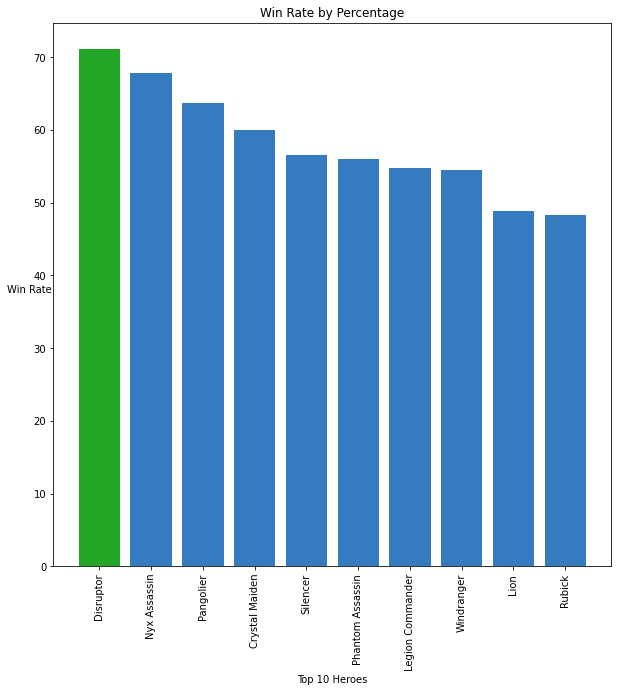

In [21]:
# color_list = []

barlist = plt.figure(figsize=(10,10))
barlist = plt.bar(topn.index, topn.win_rate, color=color_list)
barlist = plt.xticks(rotation=90)
barlist = plt.title("Win Rate by Percentage")
barlist = plt.xlabel("Top " +str(option_top) +" Heroes")
barlist = plt.ylabel("Win Rate").set_rotation(0)


# Change the color to green of the highest value

In [22]:
color_list = ["#347cbf"]*option_top
color_list

# Change the color to green, of the highest current features
feature = topn.win.tolist()
max_val = feature.index(max(feature))

color_list[max_val] = "#24a627"

Text(0.5, 1.0, 'Absolute Win No by Percentage')

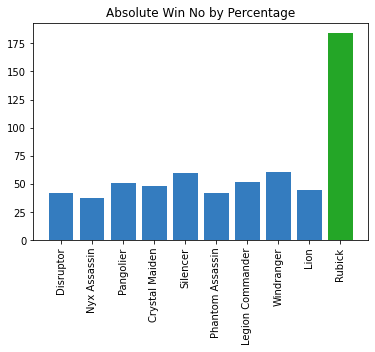

In [23]:
plt.bar(topn.index, topn.win, color=color_list)
plt.xticks(rotation=90)
plt.title("Absolute Win No by Percentage")

In [58]:
scatter_table = table
scatter_table["win_rate"] = (scatter_table.win/scatter_table.games)*100
scatter_table = scatter_table[['hero_id','primary_attr','win_rate']]
scatter_table

,hero_id,primary_attr,win_rate
0,1,agi,48.717949
1,2,str,62.500000
2,3,int,57.142857
3,4,agi,50.000000
4,5,int,60.000000
...,...,...,...
114,120,agi,63.750000
115,121,int,45.454545
116,126,int,50.000000
117,128,str,64.000000


In [63]:
scatter_table_str = scatter_table.loc[scatter_table['primary_attr'] == "str"]
scatter_table_agi = scatter_table.loc[scatter_table['primary_attr'] == "agi"]
scatter_table_int = scatter_table.loc[scatter_table['primary_attr'] == "int"]

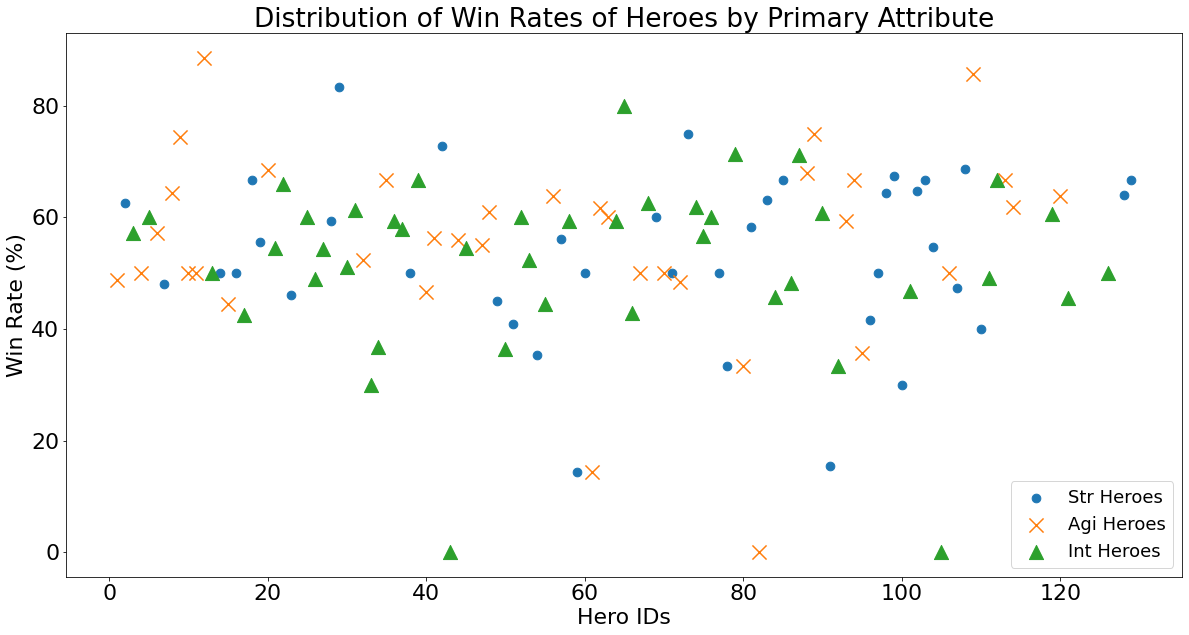

In [93]:
fig3 = plt.figure(figsize=(20, 10))
plt.rcParams.update({'font.size': 22})
ax3 = fig3.add_subplot()
ax3.scatter(x=scatter_table_str.hero_id ,y=scatter_table_str.win_rate, marker=".", s=300, label="Str Heroes")
ax3.scatter(x=scatter_table_agi.hero_id ,y=scatter_table_agi.win_rate, marker="x", s=200, label="Agi Heroes")
ax3.scatter(x=scatter_table_int.hero_id ,y=scatter_table_int.win_rate, marker="^", s=200, label="Int Heroes")
# ax3.legend(title_fontsize=100)
ax3.set_title("Distribution of Win Rates of Heroes by Primary Attribute")
ax3.set_xlabel("Hero IDs")
ax3.set_ylabel("Win Rate (%)")
ax3.legend(prop=dict(size=18), loc='lower right')

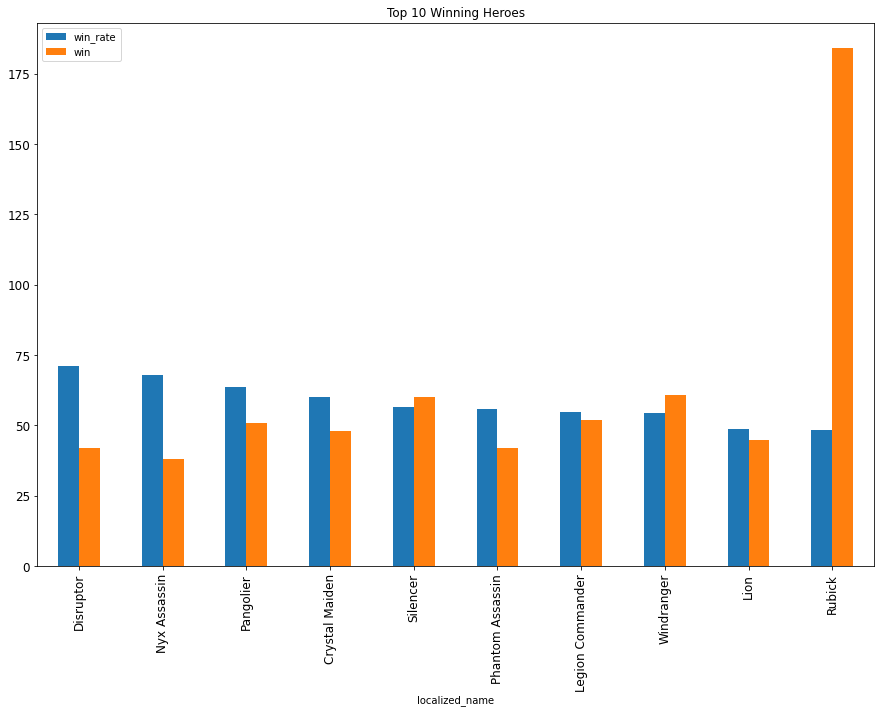

In [25]:
ax = topn[['win_rate','win']].plot(kind='bar', title ="Top 10 Winning Heroes", figsize=(15, 10), legend=True, fontsize=12)

# Machine learning Part

In [26]:
# Take 20 of their most recent matches
match_table = pd.read_json("match_learn.json")

In [27]:
match_table

,assists,deaths,duration,game_mode,hero_id,kills,leaver_status,lobby_type,match_id,party_size,player_slot,radiant_win,skill,start_time,version
0,22,8,3190,22,45,6,0,0,5732588363,3.0,4,False,2.0,2020-12-07 08:57:53,21.0
1,11,5,2102,22,64,3,0,0,5729612341,4.0,2,False,1.0,2020-12-05 08:58:09,21.0
2,11,8,2769,22,58,4,0,7,5721597253,3.0,1,False,1.0,2020-11-29 08:16:15,21.0
3,12,6,2173,22,26,3,0,7,5721547819,2.0,1,False,1.0,2020-11-29 07:31:06,21.0
4,9,5,2116,22,21,3,0,7,5718916709,3.0,2,False,1.0,2020-11-27 13:31:26,21.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3531,6,14,2603,1,35,9,0,0,401525925,NaN,4,False,NaN,2013-11-27 14:05:24,NaN
3532,12,3,2887,1,26,10,0,0,401157037,NaN,2,True,NaN,2013-11-27 08:00:02,NaN
3533,13,1,2419,1,35,10,0,0,401119238,NaN,3,True,NaN,2013-11-27 07:12:02,NaN
3534,1,0,696,1,62,0,0,0,196404382,NaN,4,True,NaN,2013-05-16 07:46:13,NaN


### We drop some certain features to simplify the model

In [96]:
match_table.columns.tolist()

['assists',
 'deaths',
 'duration',
 'game_mode',
 'hero_id',
 'kills',
 'lobby_type',
 'party_size',
 'skill',
 'status']

## Let's add some pre-processing

In [29]:
match_table = match_table.drop(columns=['leaver_status','match_id','version','start_time'])

In [30]:
match_table['party_size'] = match_table['party_size'].fillna(1)

In [31]:
match_table

,assists,deaths,duration,game_mode,hero_id,kills,lobby_type,party_size,player_slot,radiant_win,skill
0,22,8,3190,22,45,6,0,3.0,4,False,2.0
1,11,5,2102,22,64,3,0,4.0,2,False,1.0
2,11,8,2769,22,58,4,7,3.0,1,False,1.0
3,12,6,2173,22,26,3,7,2.0,1,False,1.0
4,9,5,2116,22,21,3,7,3.0,2,False,1.0
...,...,...,...,...,...,...,...,...,...,...,...
3531,6,14,2603,1,35,9,0,1.0,4,False,NaN
3532,12,3,2887,1,26,10,0,1.0,2,True,NaN
3533,13,1,2419,1,35,10,0,1.0,3,True,NaN
3534,1,0,696,1,62,0,0,1.0,4,True,NaN


In [32]:
type(match_table.player_slot.values[0])

numpy.int64

In [33]:
# Have to be this first, then the one dire side
# 0 is Radiant, 1 is Dire.
match_table.loc[match_table['player_slot'] < 128, 'player_slot'] = 0
match_table.loc[match_table['player_slot'] > 127, 'player_slot'] = 1
match_table

,assists,deaths,duration,game_mode,hero_id,kills,lobby_type,party_size,player_slot,radiant_win,skill
0,22,8,3190,22,45,6,0,3.0,0,False,2.0
1,11,5,2102,22,64,3,0,4.0,0,False,1.0
2,11,8,2769,22,58,4,7,3.0,0,False,1.0
3,12,6,2173,22,26,3,7,2.0,0,False,1.0
4,9,5,2116,22,21,3,7,3.0,0,False,1.0
...,...,...,...,...,...,...,...,...,...,...,...
3531,6,14,2603,1,35,9,0,1.0,0,False,NaN
3532,12,3,2887,1,26,10,0,1.0,0,True,NaN
3533,13,1,2419,1,35,10,0,1.0,0,True,NaN
3534,1,0,696,1,62,0,0,1.0,0,True,NaN


In [34]:
match_table.loc[match_table['radiant_win'] == False, 'radiant_win'] = 0
match_table.loc[match_table['radiant_win'] == True, 'radiant_win'] = 1
match_table

,assists,deaths,duration,game_mode,hero_id,kills,lobby_type,party_size,player_slot,radiant_win,skill
0,22,8,3190,22,45,6,0,3.0,0,0,2.0
1,11,5,2102,22,64,3,0,4.0,0,0,1.0
2,11,8,2769,22,58,4,7,3.0,0,0,1.0
3,12,6,2173,22,26,3,7,2.0,0,0,1.0
4,9,5,2116,22,21,3,7,3.0,0,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
3531,6,14,2603,1,35,9,0,1.0,0,0,NaN
3532,12,3,2887,1,26,10,0,1.0,0,1,NaN
3533,13,1,2419,1,35,10,0,1.0,0,1,NaN
3534,1,0,696,1,62,0,0,1.0,0,1,NaN


In [35]:
match_table.player_slot.values[6] == match_table.radiant_win.values[6]

True

In [36]:
match_table['status'] = 0
match_table.loc[match_table['player_slot'] == match_table['radiant_win'], 'status'] = 1

In [37]:
match_table

,assists,deaths,duration,game_mode,hero_id,kills,lobby_type,party_size,player_slot,radiant_win,skill,status
0,22,8,3190,22,45,6,0,3.0,0,0,2.0,1
1,11,5,2102,22,64,3,0,4.0,0,0,1.0,1
2,11,8,2769,22,58,4,7,3.0,0,0,1.0,1
3,12,6,2173,22,26,3,7,2.0,0,0,1.0,1
4,9,5,2116,22,21,3,7,3.0,0,0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3531,6,14,2603,1,35,9,0,1.0,0,0,NaN,1
3532,12,3,2887,1,26,10,0,1.0,0,1,NaN,0
3533,13,1,2419,1,35,10,0,1.0,0,1,NaN,0
3534,1,0,696,1,62,0,0,1.0,0,1,NaN,0


In [38]:
match_table['skill'] = match_table['skill'].fillna(0)

In [39]:
match_table = match_table.drop(columns=["player_slot","radiant_win"])
match_table

# Status is results, 1 is win, 0 is lose the match

,assists,deaths,duration,game_mode,hero_id,kills,lobby_type,party_size,skill,status
0,22,8,3190,22,45,6,0,3.0,2.0,1
1,11,5,2102,22,64,3,0,4.0,1.0,1
2,11,8,2769,22,58,4,7,3.0,1.0,1
3,12,6,2173,22,26,3,7,2.0,1.0,1
4,9,5,2116,22,21,3,7,3.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...
3531,6,14,2603,1,35,9,0,1.0,0.0,1
3532,12,3,2887,1,26,10,0,1.0,0.0,0
3533,13,1,2419,1,35,10,0,1.0,0.0,0
3534,1,0,696,1,62,0,0,1.0,0.0,0


## Okay this looks clean enough to do ML
### We'll try 4 algorithms
1. Support Vector Machine
2. Random Forest
3. KNN
4. Logistic Regression

We're going to have to do train-test-split, because we dont have new data

https://scikit-learn.org/stable/tutorial/machine_learning_map/

# KNN

In [40]:
from sklearn.model_selection import train_test_split as split

In [41]:
X = match_table.iloc[:,:-1]
y = match_table.iloc[:,-1]
X_train,X_test,y_train,y_test = split(X,y,random_state=0)

In [42]:
# X_train

In [43]:
# y_train

In [44]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

scaler.fit(X_train)
X_train_s = scaler.transform(X_train)
X_test_s = scaler.transform(X_test)

In [45]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()

In [46]:
model.fit(X_train_s, y_train)

KNeighborsClassifier()

In [47]:
print(model.score(X_test_s, y_test))
print(model.score(X_train_s, y_train))

0.752262443438914
0.8333333333333334


Seems like some overfit, probably need to check the model. The training model have a higher score than the usual ones.
Notes: Check under Day 3

# Logistic Regression

In [48]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)

In [49]:
from sklearn.linear_model import LinearRegression
model2 = LinearRegression()
model2.fit(X_train_s, y_train)

LinearRegression()

In [50]:
print(model2.score(X_test_s, y_test))
print(model2.score(X_train_s, y_train))

0.413504930963429
0.3806886202180524


Logistic Regression seems to be much worse, but does that make sense? Yes, because logistic regression is more of a Classifier

## Random Forest

In [51]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=200, max_features = 5,  max_depth=None, min_samples_split = 5)

In [52]:
forest.fit(X_train, y_train)

RandomForestClassifier(max_features=5, min_samples_split=5, n_estimators=200)

In [53]:
print(forest.score(X_train, y_train))
print(forest.score(X_test, y_test))

0.9898190045248869
0.7929864253393665


## SVM

https://www.datacamp.com/community/tutorials/svm-classification-scikit-learn-python

In [54]:
# #Import svm model
# from sklearn import svm

# #Create a svm Classifier
# clf = svm.SVC(kernel='linear') # Linear Kernel

# #Train the model using the training sets
# clf.fit(X_train, y_train)

# #Predict the response for test dataset
# y_pred = clf.predict(X_test)

In [55]:
# #Import scikit-learn metrics module for accuracy calculation
# from sklearn import metrics

# # Model Accuracy: how often is the classifier correct?
# print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

In [56]:
# # Model Precision: what percentage of positive tuples are labeled as such?
# print("Precision:",metrics.precision_score(y_test, y_pred))

# # Model Recall: what percentage of positive tuples are labelled as such?
# print("Recall:",metrics.recall_score(y_test, y_pred))

In [105]:
ml_report_data = {'Score': ["Train data", "Test data"], 'KNN': [3, 4], 'Linear Regression':[1, 2], 'Random Forest':[5,6]}
# ml_report = pd.DataFrame(columns=['Score', 'KNN', 'Linear Regression', 'Random Forest'])
ml_report = pd.DataFrame(data=ml_report_data)
ml_report_show = ml_report.set_index(['Score'])
ml_report_show

,KNN,Linear Regression,Random Forest
Score,,,
Train data,3,1,5
Test data,4,2,6
